# 2. Base de données d’animaux

In [65]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from gapminder import gapminder

### 1)
Créez un notebook pour lire la base de données et générez un dataframe.

In [9]:
filename = 'PanTHERIA_1-0_WR05_Aug2008.txt'

df = pd.read_csv(filename, delimiter = '\t')

df.describe()

,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,3-1_AgeatFirstBirth_d,18-1_BasalMetRate_mLO2hr,5-2_BasalMetRateMass_g,6-1_DietBreadth,7-1_DispersalAge_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
count,5416.000000,5.416000e+03,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.00000,5416.000000,5416.000000,...,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000
mean,-692.433346,1.159401e+05,-823.276128,-441.370303,-909.936621,-848.912626,-694.539337,-42.32449,-599.361337,-961.650096,...,-124.978658,-116.195251,-124.672821,-69.937411,-122.373892,-145.818923,-61.841064,-6.574847,580.167897,885.371204
std,461.384103,2.638103e+06,393.076695,1125.326888,286.985807,552.433154,2775.817235,12409.88190,490.519927,241.549875,...,359.006349,361.919556,354.244136,390.450236,355.359663,352.869151,419.305365,443.838735,896.708034,1009.305361
min,-999.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,-999.000000,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,...,-93.272500,-79.335000,0.000000,6.000000,0.000000,0.030000,29.832500,68.150000,269.327500,639.625000
50%,-999.000000,2.312500e+01,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.000000,-999.000000,...,3.055000,16.930000,1.000000,28.850000,2.000000,0.090000,91.065000,199.655000,843.705000,1379.115000
75%,1.000000,2.819150e+02,-999.000000,131.005000,-999.000000,-999.000000,-999.000000,-999.00000,2.000000,-999.000000,...,89.640000,99.427500,5.000000,75.602500,8.125000,0.120000,154.607500,239.215000,1276.722500,1577.025000
max,3.000000,1.543213e+08,246.000000,30480.000000,153.500000,5456.750000,113712.000000,407000.00000,8.000000,5248.980000,...,172.340000,175.750000,1119.000000,2060.500000,1119.000000,1.000000,461.000000,350.000000,1858.560000,2107.000000


### 2)
Prenez la masse corporelle (en grammes) des animaux à leur âge adulte (colonne ``« 5-1_AdultBodyMass_g »``).

In [3]:
body_mass = df['5-1_AdultBodyMass_g']

print(body_mass)

0       492714.47
1        10392.49
2         9658.70
3        11989.10
4        31756.51
          ...    
5411        40.42
5412        93.99
5413       123.00
5414       100.00
5415        95.02
Name: 5-1_AdultBodyMass_g, Length: 5416, dtype: float64


### 3)
Observez la distribution des valeurs, calculez la valeur minimale, la valeur maximale, la moyenne et la médiane. Vérifiez s’il y a des valeurs manquantes, des valeurs aberrantes, etc.

In [39]:
print(body_mass.describe())

print(f'\nMax: {body_mass.max()}')
print(f'Min: {body_mass.min()}')
print(f'Mean: {body_mass.mean()}')
print(f'Median: {body_mass.median()}')

count    5.416000e+03
mean     1.159401e+05
std      2.638103e+06
min     -9.990000e+02
25%     -9.990000e+02
50%      2.312500e+01
75%      2.819150e+02
max      1.543213e+08
Name: 5-1_AdultBodyMass_g, dtype: float64

Max: 154321304.5
Min: -999.0
Mean: 115940.09211964549
Median: 23.125


In [94]:
# Recherche de masses corporelles négatives
negative_body_mass = df.loc[(df['5-1_AdultBodyMass_g'] < 0)]['5-1_AdultBodyMass_g']

print(f'Number of Negative Body Mass Values {len(negative_body_mass)}')

Number of Negative Body Mass Values 1874


Valeurs aberrantes: 1874 valeurs négatives (-999 grammes pour une masse corporelle). 
Il s'agit sûrement d'une valeur par défaut pour des données manquantes car elle est également utilisée dans d'autres colonnes.

On peut donc considérer qu'il manque 1874 valeurs de masses corporelles.

La valeure maximale d'environ 154'000 kg, correspond à la masse d'une grande baleine bleue. Elle n'est donc pas forcément aberrante mais influence énormément le calcul de la moyenne. La médiane est donc plus représentative de l'échantillon.

### 4)
Générez un histogramme des masses corporelles.

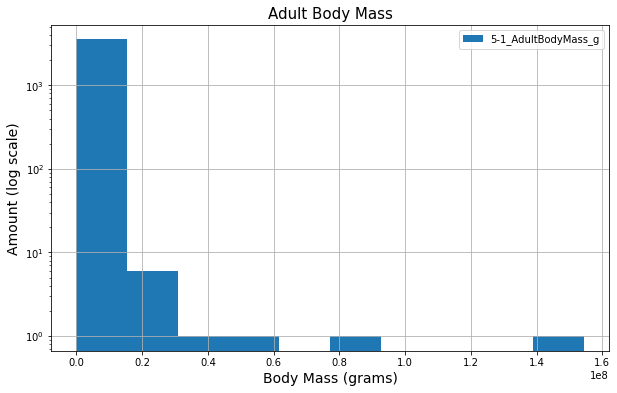

In [87]:
animals_body_mass = df.loc[df['5-1_AdultBodyMass_g'] > 0]['5-1_AdultBodyMass_g']
plt = pd.plotting.hist_series(animals_body_mass, legend=True, figsize=(10, 6))
plt.set_title('Adult Body Mass', fontsize=15)
plt.set_xlabel('Body Mass (grams)', fontsize=14)
plt.set_ylabel('Amount (log scale)', fontsize=14)
plt.set_yscale('log')

### Q6. Que pouvez-vous conclure à partir de cet histogramme ?

La distribution est unimodale et asymétrique.  
Etant donné que les données s'étendent sur une large échelle, allant de quelques grammes à plus d'une centaine de tonnes, les premiers bins de l'histogramme regroupent une très grande partie des animaux. En effet, le 1ère bin contient tous les animaux de 1g à environ 18'000 kg.

De plus, les deux derniers bins peuplés contiennent au final qu'un animal chacun.Il s'agit de la baleine boréale pour l'avant dernier et de la baleine bleue pour le dernier.

### 5)
Générez un histogramme des masses corporelles, mais pour les animaux qui n’atteignent pas les 50Kg à leur âge adulte.

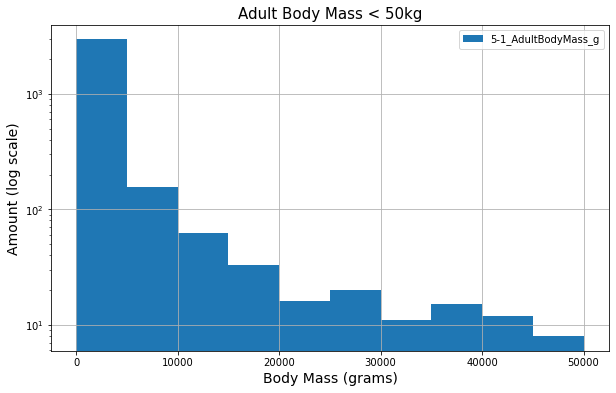

In [86]:
small_animals_body_mass = df.loc[(df['5-1_AdultBodyMass_g'] > 0) & (df['5-1_AdultBodyMass_g'] < 50_000)]['5-1_AdultBodyMass_g']

plt = pd.plotting.hist_series(small_animals_body_mass, legend=True, figsize=(10, 6))
plt.set_title('Adult Body Mass < 50kg', fontsize=15)
plt.set_xlabel('Body Mass (grams)', fontsize=14)
plt.set_ylabel('Amount (log scale)', fontsize=14)
plt.set_yscale('log')

### Q7. Que pouvez-vous conclure à partir de cet histogramme ?

La distribution est unimodale et asymétrique.
L'histogramme a un bien meilleure répartition que le précédent par son échelle beaucoup plus condensée. On observe qu'il y a une représentation très élevée d'animaux légers qu'on avait pu constaté avec le calcul de la médiane effectué précédemment.

# 3 Loi de Benford

### 1)
Prenez la masse corporelle (en grammes) des animaux à leur âge adulte (colonne « 5-1_AdultBodyMass_g ») après filtrage des données manquantes ou aberrantes.

In [95]:
animals_body_mass = df.loc[(df['5-1_AdultBodyMass_g'] > 0)]['5-1_AdultBodyMass_g']

print(animals_body_mass)

0       492714.47
1        10392.49
2         9658.70
3        11989.10
4        31756.51
          ...    
5411        40.42
5412        93.99
5413       123.00
5414       100.00
5415        95.02
Name: 5-1_AdultBodyMass_g, Length: 3542, dtype: float64


### 2)
Extrayez le chiffre le plus significatif de la masse corporelle des animaux.